## Recommender System

#### Author: Hao Zheng

When we think about marketing, most of our minds will jump to the diverse advertisements that are run on television. In reality, marketing is everywhere. Especially with the help from programming languages, advertisements can reach all corners of our lives much more easily than ever before in a way where we may not even notice. For example, retailers can adopt programming languages to personalize promotional material and replying messages via email so that customers feel connected.

In this Project, we will lead you through a combination of text processing and marketing that mainly focus on the content optimization: the recommender system allows us to understand how the system actually works. We encourage you to create your own Jupytor Notebook and follow along. You can also download this Notebook together with any accompanying data in the [Notebooks and Data](https://github.com/Master-of-Business-Analytics/Notebooks_and_Data) GitHub Repository. Alternatively, if you do not have Python or Jupyter Notebook installed yet, you may experiment with a virtual Notebook by launching Binder or Syzygy below (learn more about these two tools in the [Resource](https://analytics-at-sauder.github.io/resource.html) tab). 

<a href="https://ubc.syzygy.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2FAnalytics-at-Sauder%2FProject_11_Recommender_System&urlpath=tree%2FProject_11_Recommender_System%2Fp11_recommender_system.ipynb&branch=master" target="_blank" class="button">Launch Syzygy (UBC)</a>

<a href="https://pims.syzygy.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2FAnalytics-at-Sauder%2FProject_11_Recommender_System&urlpath=tree%2FProject_11_Recommender_System%2Fp11_recommender_system.ipynb&branch=master" target="_blank" class="button">Launch Syzygy (Google)</a>

<a href="https://mybinder.org/v2/gh/Analytics-at-Sauder/Project_11_Recommender_System/master?filepath=p11_recommender_system.ipynb" target="_blank" class="button">Launch Binder</a>

## Business Problem

---

We will use the movie industry as an ongoing example throughout this Notebookk to illustrate how the recommender system can be applied to a business context. The traditional, movie-content provider systems do not care about the general taste of the customers because the way in which they generate revenues is disconnected from their ability to identify their customers’ tastes. In other words, the traditional movie seller is only focued on providing the most popular movie and tries to sell as much of that movie as possible. However, in the modern day with the proliferation of the Internet, the way in which current movie sellers generate revenues is evolving: their profits are now highly correlated with how long customers spend on their website to watch the movie. Therefore, the recommender system is required to ensure that customers are receiving the best recommendation, customized to the indiivdual's taste, so that they spend more time on the website.

We will use the movie rating dataset to duplicate this recommendation process.


In [135]:
# Import the packages and read in the data

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
df1=pd.read_csv('data/tmdb_5000_credits.csv')
df2=pd.read_csv('data/tmdb_5000_movies.csv')

## Explore the Data

---

The data are clean, so we will not have to go through the data cleaning process again. Even so, it is still helpful to look at the data before we start to play around with them.

In [136]:
# Explore the column names to find out what is in the dataframe
print("The first dataframe includes the information about: " )
for i in df1.columns: print(i, end  =", ")
print("\nThe second dataframe includes the information about: ")
for i in df2.columns: print(i, end  =", ")

The first dataframe includes the information about: 
movie_id, title, cast, crew, 
The second dataframe includes the information about: 
budget, genres, homepage, id, keywords, original_language, original_title, overview, popularity, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, status, tagline, title, vote_average, vote_count, 

The first dataframe includes four different columns that capture the general production information about the movie, while the second dataframe includes more detailed information, such as genres and popularity. We can see that both dataframes include the unique identifier for the movie, `id`, which will allow us to combine the two datasets, for simplicity.

In [137]:
# Change the columns name to id so it is ready to merge
df1.columns = ['id','tittle','cast','crew']

# Merge two dataset on the unique identifier
new_df= pd.merge(df1,df2,on='id')
new_df.head(2)

,id,tittle,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


## Building the Recommender System

---

### Method 1: Demographic Filtering

The demographic filtering method is the primary method that we will be using in this Project. In this method, we are giving users a movie recommendation based on the genre of the movie. Generally, movies with higher popularity ratings are more likely to be enjoyed by new users. In order to implement this method, we will need to: 
1. Find a scientific way to reflect the popularity of the movie, and then 
2. Recommend the most popular movie.

In finding a scientific way to reflect the popularity of the movie, we will consider two factors: `vote_average` and `vote_count`. The former reflects the overall opinion of the movie, while the latter reflects how accurate the average score is. There are countless way to calculate a popularity score, so we encourage you to think about of an alternative way.

The final popularity score that we will use here is calculated as follows:

> average vote score + (vote score of selected film - average vote score) * ((vote count of selected film -  average vote count)/average vote count) ^ 2


In [138]:
# Define the method to calculate the score:

am = new_df['vote_average'].mean()
bm = new_df['vote_count'].mean()

def rating(x):
    a = x['vote_average']
    b = x['vote_count']
    
    return am + (a - am)* ((b - bm)/bm) ** 2


In [140]:
# Apply the function to the entire dataframe

## Create a new df for method 1
new_df1 = new_df.copy()

new_df1['score_cal'] = new_df.apply(rating,axis = 1)
new_df1.head(2)

,id,tittle,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,score_cal
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,293.111430
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,30.704168


In [141]:
# Print out the top five films
new_df1 = new_df1.sort_values('score_cal', ascending=False)
new_df1[['title', 'score_cal']].head(5)

,title,score_cal
96,Inception,725.141884
65,The Dark Knight,572.233379
95,Interstellar,442.582874
662,Fight Club,358.708821
16,The Avengers,343.465619


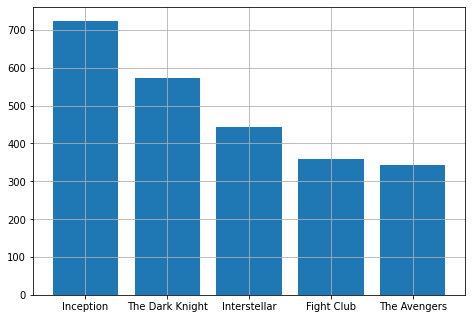

In [142]:
# Visualize the result

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(new_df1['title'][0:5],new_df1['score_cal'][0:5])
plt.grid(True)
plt.show()

Based on the calculated popularity scores, we can comfortably recommend the top five most popular movies of the dataframe: *Inception, The Dark Knight, Intersetllar, Fight Club*, and *The Avengers*. We recommend these five movies to all new users, because these five are the most popular movies, and so are the most likely to be enjoyed by new users.

However, due to the lack of personalization in recommending the top five most popular movies, this is not an ideal way of making a recommender system. All incoming users will receive the same recommendation, disregarding the movies genres that each individual user prefers. Instead, we will want to try a different method to our recommender system so that we can reflect personal preferences for customized recommendations.

### Method 2: Content-Based Filtering

This method will focus on recommending similar movies based on personal taste. For example, if a new user just finished watching an action movie with English subtitles, the next movie recommended to this user will likely to be another action movie with English subtitles. Let us work through how to build such a recommender system.

In this recommender system, we will use genres and keywords to help us identify and then recommend similar films. In the dataset, both `genres` and `keywords` are stored as string values, so we will first need to perform some text extraction before moving to next step.

In [151]:
# Extract important words form selected_columns

from ast import literal_eval

new_df2 = new_df.copy()
selected_columns = ["genres","keywords"]

for feature in selected_columns:
    new_df2[feature] = new_df2[feature].apply(literal_eval)

In [152]:
# Return the top 3 elements/entire list(if there are less than 3 elements) and change all element to low case
## Reference: 
## https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system/#Content-Based-Filtering

def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names
    return []

def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [153]:
# Apply the defined method so it is ready for further processing

for feature in selected_columns:
    new_df2[feature] = new_df2[feature].apply(get_list)
    
for feature in selected_columns:
    new_df2[feature] = new_df2[feature].apply(clean_data)


In the next step, we use the `cosine_similarity` function to develop the new score in this method, and thus to find which movies to recommend.

In [176]:
# Concat the two feature together 

for i, r in new_df2.iterrows():
     new_df2['test'][i] = " ".join(new_df2["genres"][i]) + " ".join(new_df2["keywords"][i])

# Use Vectorizer to change words into matrix

from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(new_df2['test'])

# Introduce cosines similarity
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

/Users/haozheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [196]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(new_df2.index, index=new_df2['title']).drop_duplicates()

# Use the cosines similarity to find out which movies to recommend
def get_recom(title,cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]


In [197]:
get_recom('Avatar', cosine_sim2)

85        Captain America: The Winter Soldier
2444                          Damnation Alley
71      The Mummy: Tomb of the Dragon Emperor
83                                 The Lovers
518                          Inspector Gadget
600                              Killer Elite
678                              Dragon Blade
786                         The Monkey King 2
1273                              Extreme Ops
1324                         Virgin Territory
Name: title, dtype: object

Here, we have a recommendation list that is based on a user's preference. By incorporating personal preferences into the recommender system, it is expected that this second method will perform significantly better than the first method. However, even this second recommender system can continue to be improved.

## Next Step

---

Apart from the two methods explored in this Notebook, there is a third, known as the collaborative filtering method, which combines the two methods that we are now familiar with: demographic filtering (method 1) and content-based filtering (method 2). The collaborative filtering method will allow us to combine the results from the first two methods and give different weights to them. 

For example, if *Avater* is the 20th recommended movie using demographic filtering and the 4th recommended movie using content-based filtering out of a database of 100 movies. We can generate a new score with reverse ranking using the two methods, with equal weights, in our calculation:

> 0.5 * (100 - 4) + 0.5 * (100 - 20)

We can use this new score to rank the movie again, just like we did in demographic filtering method. Can you try this yourself?

## References

---

https://www.kaggle.com/tmdb/tmdb-movie-metadata


https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system/?select=tmdb_5000_movies.csv